In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import numpy as np

In [2]:
raw_df = pd.read_csv('./winemag-data-130k-v2.csv')
print(raw_df.count())

Unnamed: 0               129971
country                  129908
description              129971
designation               92506
points                   129971
price                    120975
province                 129908
region_1                 108724
region_2                  50511
taster_name              103727
taster_twitter_handle     98758
title                    129971
variety                  129970
winery                   129971
dtype: int64


In [3]:
raw_df.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [4]:
raw_df = raw_df.drop(columns=['Unnamed: 0','taster_name', 'taster_twitter_handle']) # Drop columns that woon't be used
raw_df = raw_df.dropna(subset=['points']) # Drop all rows when the column 'points' is na
print(raw_df.count())
raw_df.head()

country        129908
description    129971
designation     92506
points         129971
price          120975
province       129908
region_1       108724
region_2        50511
title          129971
variety        129970
winery         129971
dtype: int64


,country,description,designation,points,price,province,region_1,region_2,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


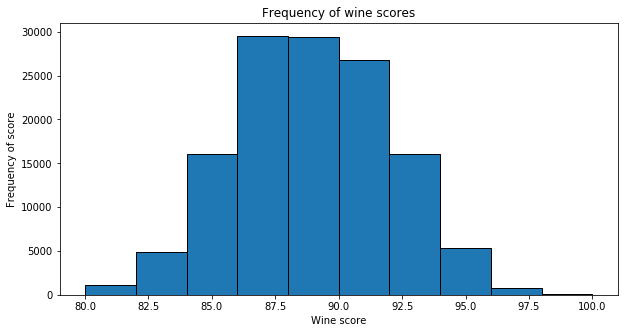

In [5]:
plt.figure(figsize = (10,5))
raw_df['points'].hist(grid = False, edgecolor = "black")
plt.title("Frequency of wine scores")
plt.xlabel("Wine score")
plt.ylabel("Frequency of score")
plt.savefig("./Charts/130k_Frequency of wine scores.png")

Observations:
* Scores in the dataset range between (80, 100)
* More than 50% of the scores are clustered around (86, 91)

---X---

## Location - How does it impact quality and price of wine?

In [6]:
country_df = raw_df # Create a copy of raw dataframe
country_df = country_df.dropna(subset=['country', 'price']) # Drop all rows when the columns 'country' and 'price' are na
country_df.head()# take mean scores and plot pie chart

,country,description,designation,points,price,province,region_1,region_2,title,variety,winery
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
5,Spain,Blackberry and raspberry aromas show a typical...,Ars In Vitro,87,15.0,Northern Spain,Navarra,NaN,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem


In [7]:
grp_country_df = country_df.groupby('country')
grp_country_df = grp_country_df.mean()
grp_country_pts_df = grp_country_df.sort_values(by=['points'], ascending = False)
grp_country_pts_df.head()

,points,price
country,,
England,91.550725,51.681159
India,90.222222,13.333333
Austria,90.190782,30.762772
Germany,89.836321,42.257547
Canada,89.377953,35.712598


In [8]:
grp_country_price_df = grp_country_df.sort_values(by=['price'])
grp_country_price_df.head()

,points,price
country,,
Ukraine,84.071429,9.214286
Bosnia and Herzegovina,86.500000,12.500000
India,90.222222,13.333333
Armenia,87.500000,14.500000
Bulgaria,87.936170,14.645390


In [9]:
grp_country_value_df = grp_country_df
grp_country_value_df['value'] = grp_country_value_df['points']/ grp_country_value_df['price']
grp_country_value_df = grp_country_value_df.sort_values(by=['value'], ascending = False)
grp_country_value_df.head()

,points,price,value
country,,,
Ukraine,84.071429,9.214286,9.124031
Bosnia and Herzegovina,86.500000,12.500000,6.920000
India,90.222222,13.333333,6.766667
Armenia,87.500000,14.500000,6.034483
Bulgaria,87.936170,14.645390,6.004358


### Charts

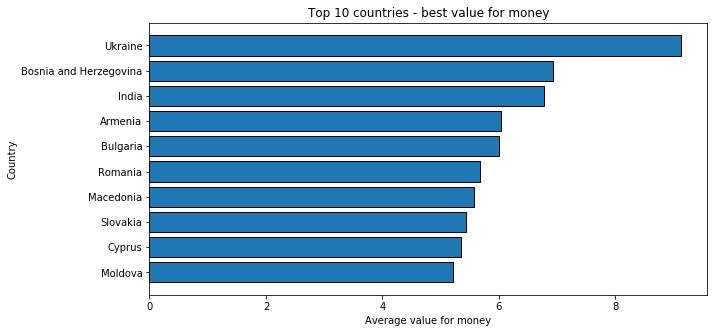

In [10]:
grp_country_value_bar_df = grp_country_value_df.head(10)
grp_country_value_bar_df = grp_country_value_bar_df.sort_values(by=['value'])
#y_axis = grp_country_value_bar_df.index
x_axis = grp_country_value_bar_df['value']
y_axis = grp_country_value_bar_df.index
plt.figure(figsize = (10,5))
plt.barh(y_axis, x_axis, edgecolor = "black")
plt.title("Top 10 countries - best value for money")
plt.xlabel("Average value for money")
plt.ylabel("Country")
plt.savefig("./Charts/130k_Top 10 countries_best value for money.png")
plt.show()

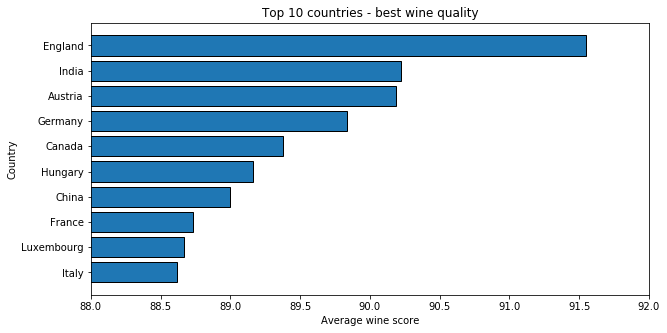

In [11]:
grp_country_pts_bar_df = grp_country_pts_df.head(10)
grp_country_pts_bar_df = grp_country_pts_bar_df.sort_values(by=['points'])
x_axis = grp_country_pts_bar_df['points']
y_axis = grp_country_pts_bar_df.index
plt.figure(figsize = (10,5))
plt.barh(y_axis, x_axis, edgecolor = "black")
plt.xlim(88,92)
plt.title("Top 10 countries - best wine quality")
plt.xlabel("Average wine score")
plt.ylabel("Country")
plt.savefig("./Charts/130k_Top 10 countries_best wine quality.png")
plt.show()

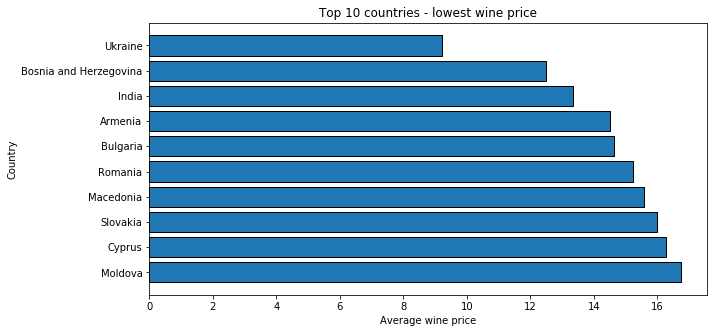

In [12]:
grp_country_price_bar_df = grp_country_price_df.head(10)
grp_country_price_bar_df = grp_country_price_bar_df.sort_values(by=['price'],ascending = False)
x_axis = grp_country_price_bar_df['price']
y_axis = grp_country_price_bar_df.index
plt.figure(figsize = (10,5))
plt.barh(y_axis, x_axis, edgecolor = "black")
plt.title("Top 10 countries - lowest wine price")
plt.xlabel("Average wine price")
plt.ylabel("Country")
plt.savefig("./Charts/130k_Top 10 countries_lowest wine price.png")
plt.show()

---X---

## Price - How does it impact quality of wine?

In [13]:
price_df = raw_df # Create a copy of raw dataframe
price_df = price_df.dropna(subset=['price']) # Drop all rows when the columns 'price' is na
price_df.head()

,country,description,designation,points,price,province,region_1,region_2,title,variety,winery
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
5,Spain,Blackberry and raspberry aromas show a typical...,Ars In Vitro,87,15.0,Northern Spain,Navarra,NaN,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem


### Charts

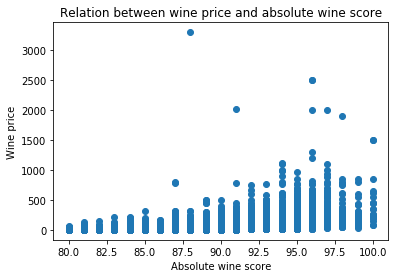

In [14]:
x_axis = price_df['points']
y_axis = price_df['price']
plt.scatter(x_axis, y_axis, marker="o")
plt.title("Relation between wine price and absolute wine score")
plt.xlabel("Absolute wine score")
plt.ylabel("Wine price")
plt.show()

In [15]:
grp_price_df = price_df.groupby('points')
grp_price_df = grp_price_df.mean()
grp_price_df.head()

,price
points,
80,16.372152
81,17.182353
82,18.870767
83,18.237353
84,19.310215


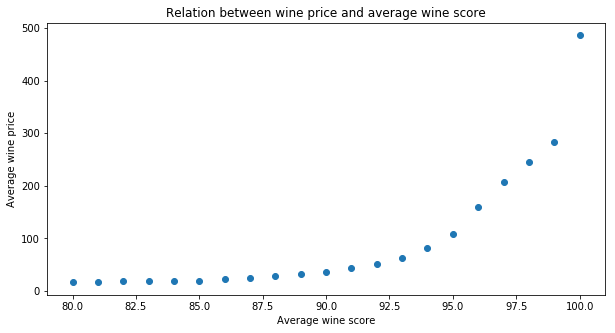

In [16]:
x_axis = grp_price_df.index
y_axis = grp_price_df['price']
plt.figure(figsize = (10,5))
plt.scatter(x_axis, y_axis, marker="o")
plt.title("Relation between wine price and average wine score")
plt.xlabel("Average wine score")
plt.ylabel("Average wine price")
plt.savefig("./Charts/130k_Relation_between_wine_price_and_average_wine_score.png")
plt.show()

---X---

## Age - How does it impact quality and price of wine?

In [17]:
# Define a function to parse year from a string

year_low = 1950
year_high = 2020

def year_parse(var):
    numbers = re.findall('\d+',var)
    numbers = set([int(n) for n in numbers])
    if len(numbers)>0 and max(numbers)>year_low and max(numbers)<2020:
        return max(numbers)
    else:
        return None

In [18]:
age_df = raw_df # Create a copy of raw dataframe
age_df['Year'] = age_df['title'].apply(year_parse, convert_dtype=False) # Apply year_parse function to 'title' column
age_df = age_df.dropna(subset=['Year', 'price']) # Drop all rows when the columns 'Year' and 'price' are na
age_df.head()

,country,description,designation,points,price,province,region_1,region_2,title,variety,winery,Year
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,2011
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,2013
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,2013
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,2012
5,Spain,Blackberry and raspberry aromas show a typical...,Ars In Vitro,87,15.0,Northern Spain,Navarra,NaN,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem,2011


In [19]:
#print(f"Number of records with no age information: {age_df['Year'].isna().sum()}")
print(f"The most aged wine recorded in the dataset is: {age_df['Year'].min()}")
print(f"The least aged wine recorded in the dataset is: {age_df['Year'].max()}")

The most aged wine recorded in the dataset is: 1952
The least aged wine recorded in the dataset is: 2017


### Charts

In [20]:
# Binning years
year_bins = [1950, 2000, 2005, 2010, 2015, 2021]
bin_labels = ["1951-2000", "2001-2005", "2006-2010", "2011-2015", "2016-2020"]
bin_df = age_df 
bin_df["Year bin"] = pd.cut(bin_df["Year"], year_bins, labels = bin_labels)
bin_df.head()

C:\Users\Ragavendar Kumar\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,country,description,designation,points,price,province,region_1,region_2,title,variety,winery,Year,Year bin
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,2011,2011-2015
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,2013,2011-2015
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,2013,2011-2015
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,2012,2011-2015
5,Spain,Blackberry and raspberry aromas show a typical...,Ars In Vitro,87,15.0,Northern Spain,Navarra,NaN,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem,2011,2011-2015


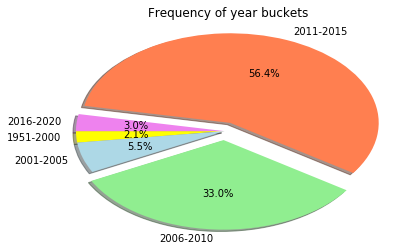

In [21]:
year_bucket_freq_lst = (bin_df.groupby('Year bin').count())['points']
pie_colors1 = ["yellow","lightblue", "lightgreen", "coral", "violet"]
# Build Pie Chart
plt.pie(year_bucket_freq_lst,
        labels=year_bucket_freq_lst.index,
        colors=pie_colors1,
        explode = (0,0,0.1,0.1,0),
        autopct="%1.1f%%",
        shadow=True,
        startangle=180)
plt.axis("tight")
plt.title("Frequency of year buckets")
plt.savefig("./Charts/130k_Frequency_of_year_buckets.png")

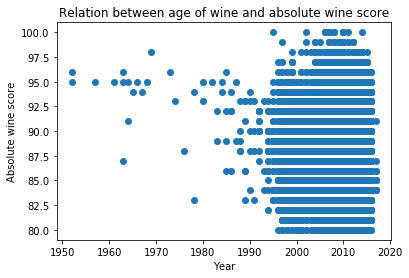

In [22]:
x_axis = age_df['Year']
y_axis = age_df['points']
plt.scatter(x_axis, y_axis, marker="o")
plt.title("Relation between age of wine and absolute wine score")
plt.xlabel("Year")
plt.ylabel("Absolute wine score")
plt.show()

In [23]:
grp_age_df = age_df.groupby('Year')
grp_age_df = grp_age_df.mean()
grp_age_df.head()

,points,price
Year,,
1952,95.500000,457.000000
1957,95.000000,375.000000
1961,95.000000,320.000000
1963,92.666667,552.333333
1964,93.000000,356.500000


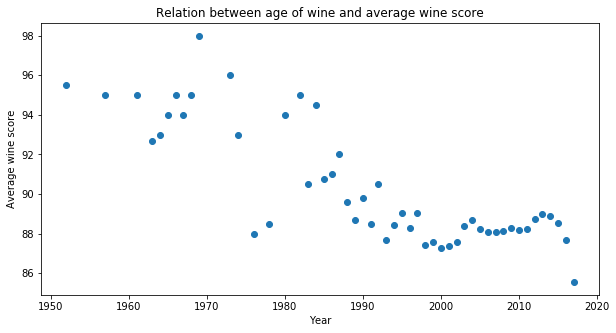

In [24]:
x_axis = grp_age_df.index
y_axis = grp_age_df['points']
plt.figure(figsize = (10,5))
plt.scatter(x_axis, y_axis, marker="o")
plt.title("Relation between age of wine and average wine score")
plt.xlabel("Year")
plt.ylabel("Average wine score")
plt.savefig("./Charts/130k_Relation_between_age_of_wine_and_average_wine_score.png")
plt.show()

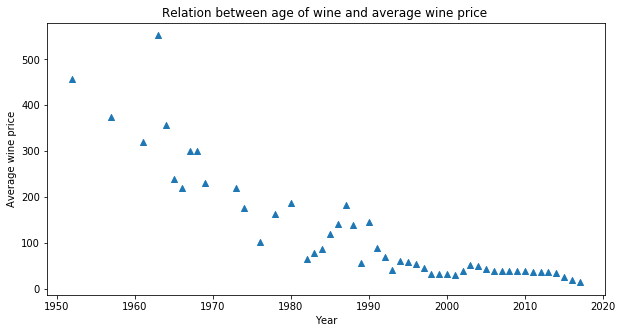

In [25]:
x_axis = grp_age_df.index
y_axis = grp_age_df['price']
plt.figure(figsize = (10,5))
plt.scatter(x_axis, y_axis, marker="^")
plt.title("Relation between age of wine and average wine price ")
plt.xlabel("Year")
plt.ylabel("Average wine price")
plt.savefig("./Charts/130k_Relation_between_age_of_wine_and_average_wine_price.png")
plt.show()

Limitation:
* Prices for older wines seem to be low, which is unusual. This could be because the price data did not account for inflation.

## Relation between wine quality and length of review

In [26]:
def str_length(sent):
        return len(sent.split())

In [27]:
rev_df = raw_df # Create a copy of raw dataframe
rev_df = rev_df.dropna(subset=['description']) # Drop all rows when the columns 'description' and 'points' are na
rev_df['Review length'] = rev_df['description'].apply(str_length) # Apply len (sent.split()) function to 'description' column
rev_df.head()

,country,description,designation,points,price,province,region_1,region_2,title,variety,winery,Year,Review length
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia,2013,24
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos,2011,38
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm,2013,28
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian,2013,33
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks,2012,41


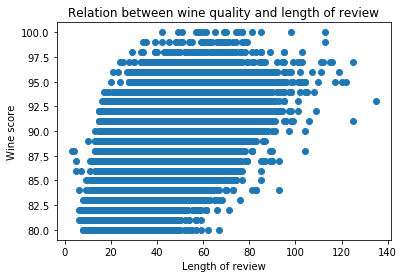

In [28]:
x_axis = rev_df['Review length']
y_axis = rev_df['points']
plt.scatter(x_axis, y_axis, marker="o")
plt.title("Relation between wine quality and length of review")
plt.xlabel("Length of review")
plt.ylabel("Wine score")
plt.show()

In [29]:
grp_rev_df = rev_df.groupby('points')
grp_rev_df = grp_rev_df.mean()
grp_rev_df.head()

,price,Review length
points,,
80,16.372152,26.216625
81,17.182353,26.885838
82,18.870767,28.088780
83,18.237353,31.367603
84,19.310215,32.507562


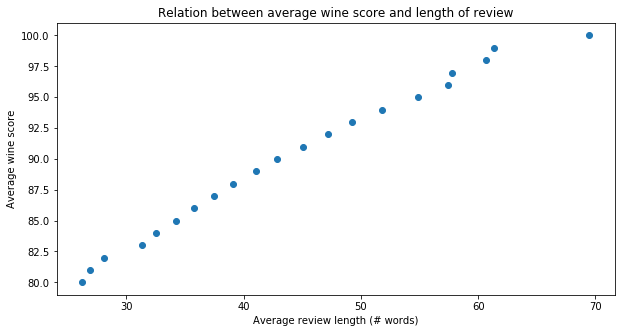

In [30]:
x_axis = grp_rev_df.index
y_axis = grp_rev_df['Review length']
plt.figure(figsize = (10,5))
plt.scatter(y_axis, x_axis, marker="o")
plt.title("Relation between average wine score and length of review")
plt.xlabel("Average review length (# words)")
plt.ylabel("Average wine score")
plt.savefig("./Charts/130k_Relation_between_average_wine_score_and_length_of_review.png")
plt.show()